<a href="https://colab.research.google.com/github/Flugrael/Admission_University/blob/main/Marie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Special Project of Marie**

## **Data Understanding**

### **Load the Data**

In [6]:
import pandas as pd
df = pd.read_csv('/content/marie.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.replace({'sel': {'aufgenommen': 1, 'nicht aufgenommen': 0}})
df = df.dropna(subset=['Quote', 'bi_score', "ch_score", "ph_score", "ma_score", "tv_score"])

In [7]:
df

,alter,Quote,Schultyp,fz_score,zf_score,gm_score,md_score,bi_score,ch_score,ph_score,ma_score,tv_score,sel,geschlecht
0,25.0,Österreich,Gymnasium,21.0,23.0,19.0,11.0,50.0,29.0,20.0,20.0,24.0,1,w
1,20.0,EU,Gymnasium,19.0,26.0,17.0,12.0,45.0,26.0,16.0,18.0,24.0,1,w
2,19.0,Österreich,Realgymnasium,18.0,25.0,19.0,12.0,41.0,27.0,18.0,19.0,22.0,1,w
3,20.0,Österreich,Realgymnasium,21.0,26.0,19.0,13.0,41.0,22.0,11.0,18.0,23.0,1,m
4,21.0,Österreich,H.techn.u.gewerbl. Lehranstalt,21.0,21.0,19.0,12.0,44.0,24.0,18.0,19.0,23.0,1,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,28.0,nicht EU,Humanistisches Gymnasium,9.0,6.0,5.0,2.0,8.0,9.0,6.0,0.0,2.0,0,w
4160,35.0,Österreich,Naturwissensch. Realgymnasium,11.0,5.0,7.0,3.0,9.0,0.0,0.0,0.0,6.0,0,m
4161,28.0,nicht EU,Gymnasium,4.0,10.0,6.0,1.0,12.0,4.0,1.0,5.0,4.0,0,m
4163,19.0,Österreich,Oberstufenrealgymnasium,4.0,4.0,6.0,3.0,12.0,7.0,3.0,5.0,6.0,0,m


### **Data Exploration**

In [8]:
df.Schultyp.value_counts().head(7)

Gymnasium                        1920
Realgymnasium                     445
Oberstufenrealgymnasium           312
Naturwissensch. Realgymnasium     285
Humanistisches Gymnasium          215
Neusprachliches Gymnasium         180
ausländische Reifeprüfung         147
Name: Schultyp, dtype: int64

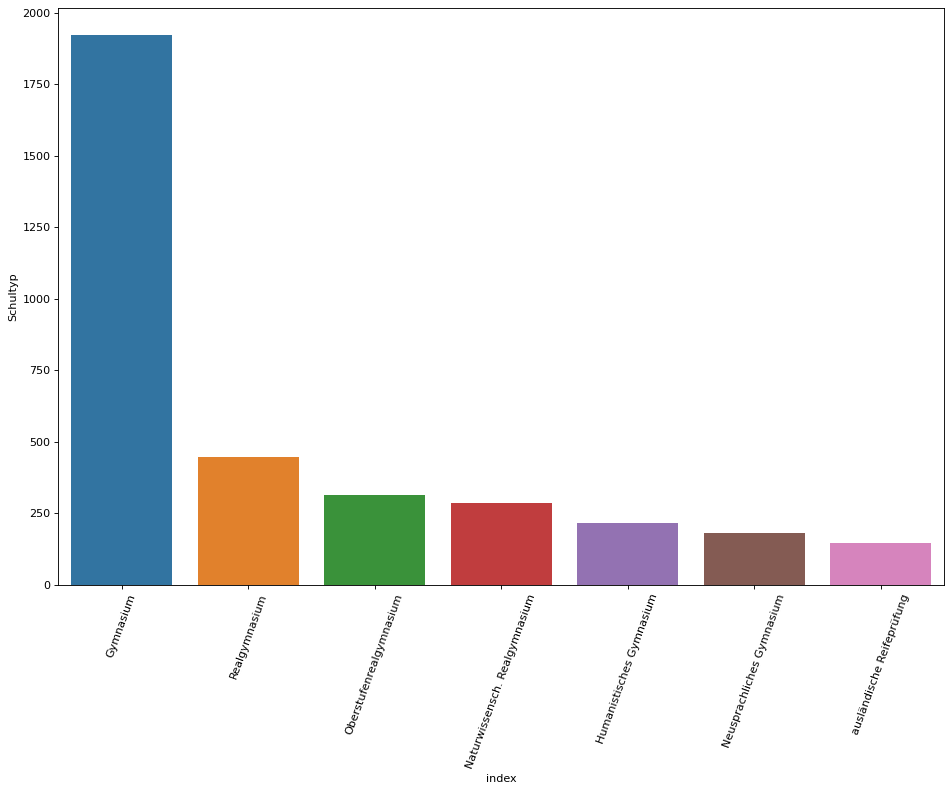

In [9]:
df1 = df.Schultyp.value_counts().head(7).to_frame().reset_index()
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
sns.barplot(x="index", y="Schultyp", data=df1)
plt.xticks(rotation=70)
plt.tight_layout()

In [10]:
df1

,index,Schultyp
0,Gymnasium,1920
1,Realgymnasium,445
2,Oberstufenrealgymnasium,312
3,Naturwissensch. Realgymnasium,285
4,Humanistisches Gymnasium,215
5,Neusprachliches Gymnasium,180
6,ausländische Reifeprüfung,147


In [11]:
df1 = df.Schultyp.value_counts().to_frame().reset_index()

In [12]:
df1

,index,Schultyp
0,Gymnasium,1920
1,Realgymnasium,445
2,Oberstufenrealgymnasium,312
3,Naturwissensch. Realgymnasium,285
4,Humanistisches Gymnasium,215
5,Neusprachliches Gymnasium,180
6,ausländische Reifeprüfung,147
7,Handelsakademie,131
8,H.techn.u.gewerbl. Lehranstalt,125
9,H.Lehranst. f.wirtsch. Berufe,115


In [13]:
df1.loc[df1.Schultyp < 100, 'Schultyp'].sum()

280

In [14]:
df2 = df1.loc[df1.Schultyp > 100]

In [15]:
df2

,index,Schultyp
0,Gymnasium,1920
1,Realgymnasium,445
2,Oberstufenrealgymnasium,312
3,Naturwissensch. Realgymnasium,285
4,Humanistisches Gymnasium,215
5,Neusprachliches Gymnasium,180
6,ausländische Reifeprüfung,147
7,Handelsakademie,131
8,H.techn.u.gewerbl. Lehranstalt,125
9,H.Lehranst. f.wirtsch. Berufe,115


In [16]:
df2.loc[-1] = ['others', 280 ]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [17]:
df2

,index,Schultyp
0,Gymnasium,1920
1,Realgymnasium,445
2,Oberstufenrealgymnasium,312
3,Naturwissensch. Realgymnasium,285
4,Humanistisches Gymnasium,215
5,Neusprachliches Gymnasium,180
6,ausländische Reifeprüfung,147
7,Handelsakademie,131
8,H.techn.u.gewerbl. Lehranstalt,125
9,H.Lehranst. f.wirtsch. Berufe,115


In [18]:
df2 = df2.reset_index(drop = True)

In [19]:
df2

,index,Schultyp
0,Gymnasium,1920
1,Realgymnasium,445
2,Oberstufenrealgymnasium,312
3,Naturwissensch. Realgymnasium,285
4,Humanistisches Gymnasium,215
5,Neusprachliches Gymnasium,180
6,ausländische Reifeprüfung,147
7,Handelsakademie,131
8,H.techn.u.gewerbl. Lehranstalt,125
9,H.Lehranst. f.wirtsch. Berufe,115


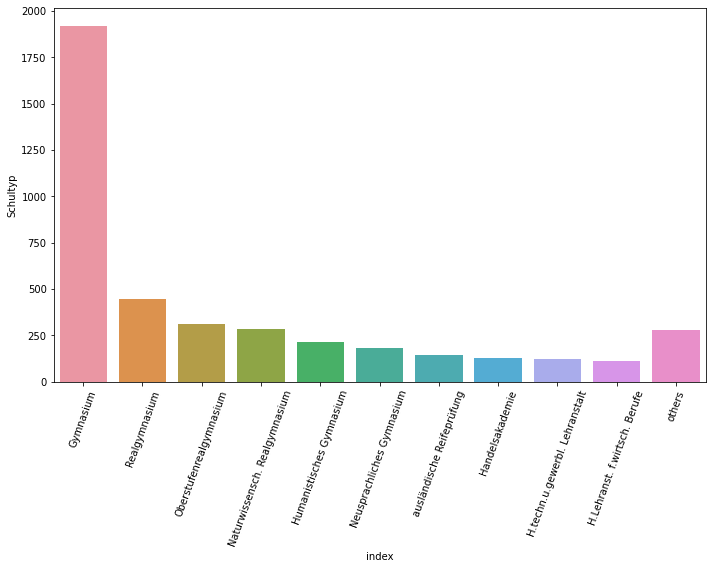

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(10, 8)) #plot save
sns.barplot(x="index", y="Schultyp", data=df2)
plt.xticks(rotation=70)
plt.tight_layout()
fig.savefig('bar1.png', dpi=400) #plot save

In [21]:
df

,alter,Quote,Schultyp,fz_score,zf_score,gm_score,md_score,bi_score,ch_score,ph_score,ma_score,tv_score,sel,geschlecht
0,25.0,Österreich,Gymnasium,21.0,23.0,19.0,11.0,50.0,29.0,20.0,20.0,24.0,1,w
1,20.0,EU,Gymnasium,19.0,26.0,17.0,12.0,45.0,26.0,16.0,18.0,24.0,1,w
2,19.0,Österreich,Realgymnasium,18.0,25.0,19.0,12.0,41.0,27.0,18.0,19.0,22.0,1,w
3,20.0,Österreich,Realgymnasium,21.0,26.0,19.0,13.0,41.0,22.0,11.0,18.0,23.0,1,m
4,21.0,Österreich,H.techn.u.gewerbl. Lehranstalt,21.0,21.0,19.0,12.0,44.0,24.0,18.0,19.0,23.0,1,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,28.0,nicht EU,Humanistisches Gymnasium,9.0,6.0,5.0,2.0,8.0,9.0,6.0,0.0,2.0,0,w
4160,35.0,Österreich,Naturwissensch. Realgymnasium,11.0,5.0,7.0,3.0,9.0,0.0,0.0,0.0,6.0,0,m
4161,28.0,nicht EU,Gymnasium,4.0,10.0,6.0,1.0,12.0,4.0,1.0,5.0,4.0,0,m
4163,19.0,Österreich,Oberstufenrealgymnasium,4.0,4.0,6.0,3.0,12.0,7.0,3.0,5.0,6.0,0,m


In [22]:
df.loc[df.alter <= 38, "group"]= "group1"
df.loc[df.alter > 38, "group"]= "group2"

In [23]:
df.group.value_counts()

group1    4133
group2      22
Name: group, dtype: int64

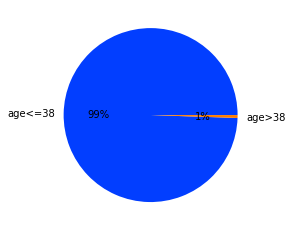

In [24]:
data = [4133, 22]
keys = ['age<=38' , 'age>38']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

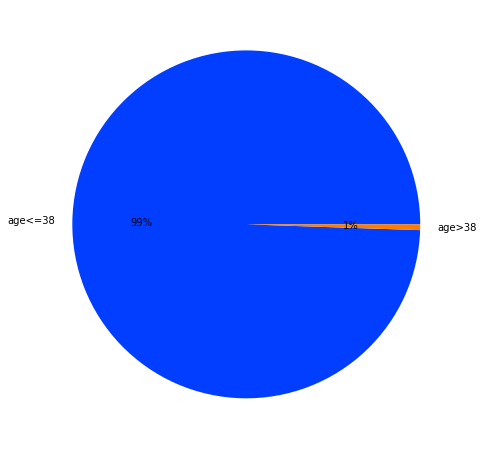

In [25]:
fig = plt.figure(figsize=(10, 8)) #plot save
data = [4133, 22]
keys = ['age<=38' , 'age>38']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()
fig.savefig('pie1.png', dpi=400) #plot save

In [26]:
df.Quote.value_counts()

Österreich    2756
EU            1294
nicht EU       105
Name: Quote, dtype: int64

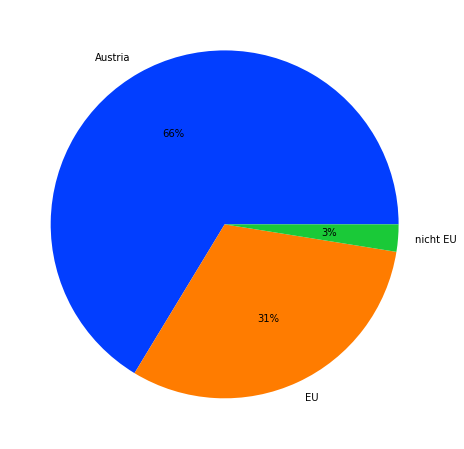

In [27]:
fig = plt.figure(figsize=(10, 8)) #plot save
data = [2756, 1294, 105]
keys = ['Austria' , 'EU', "nicht EU"]
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()
fig.savefig('pie2.png', dpi=400) #plot save

In [28]:
df.geschlecht.value_counts()

w    2447
m    1708
Name: geschlecht, dtype: int64

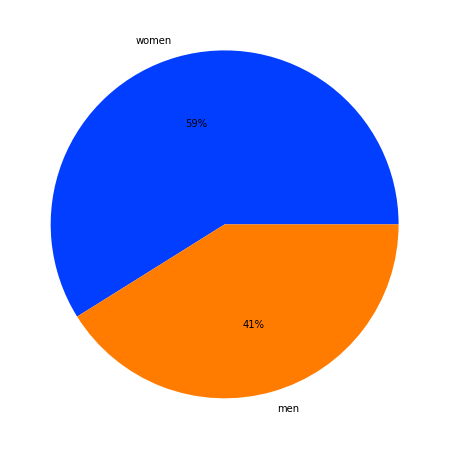

In [29]:
fig = plt.figure(figsize=(10, 8)) #plot save
data = [2447, 1708]
keys = ["women", "men"]
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()
fig.savefig('pie3.png', dpi=400) #plot save

In [30]:
df.dtypes

alter         float64
Quote          object
Schultyp       object
fz_score      float64
zf_score      float64
gm_score      float64
md_score      float64
bi_score      float64
ch_score      float64
ph_score      float64
ma_score      float64
tv_score      float64
sel             int64
geschlecht     object
group          object
dtype: object

### **Correlation Matrix**

In [31]:
df.corr() #correlation

,alter,fz_score,zf_score,gm_score,md_score,bi_score,ch_score,ph_score,ma_score,tv_score,sel
alter,1.000000,-0.036871,-0.107259,-0.084296,-0.016774,0.026865,-0.009551,-0.019354,-0.128640,-0.072479,-0.002610
fz_score,-0.036871,1.000000,0.391230,0.225773,0.291381,0.285204,0.295387,0.275700,0.282163,0.292021,0.364579
zf_score,-0.107259,0.391230,1.000000,0.297516,0.456454,0.319129,0.335350,0.320314,0.435927,0.423777,0.431258
gm_score,-0.084296,0.225773,0.297516,1.000000,0.173733,0.335316,0.302897,0.244819,0.233898,0.335560,0.404655
md_score,-0.016774,0.291381,0.456454,0.173733,1.000000,0.261655,0.299649,0.273418,0.345028,0.408719,0.374213
bi_score,0.026865,0.285204,0.319129,0.335316,0.261655,1.000000,0.709126,0.518745,0.325162,0.537194,0.541884
ch_score,-0.009551,0.295387,0.335350,0.302897,0.299649,0.709126,1.000000,0.557596,0.345879,0.478895,0.513142
ph_score,-0.019354,0.275700,0.320314,0.244819,0.273418,0.518745,0.557596,1.000000,0.411226,0.409804,0.470964
ma_score,-0.128640,0.282163,0.435927,0.233898,0.345028,0.325162,0.345879,0.411226,1.000000,0.393011,0.413015
tv_score,-0.072479,0.292021,0.423777,0.335560,0.408719,0.537194,0.478895,0.409804,0.393011,1.000000,0.393356


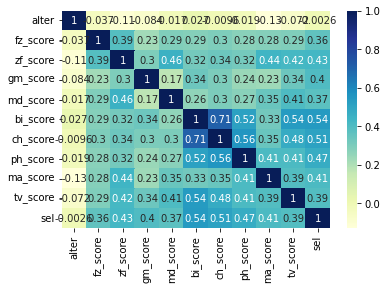

In [32]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### one hot encoding

In [33]:
df = pd.get_dummies(df)

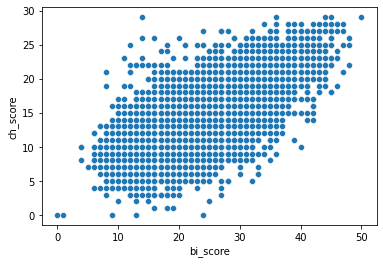

In [34]:
sns.scatterplot(data=df, x="bi_score", y="ch_score")

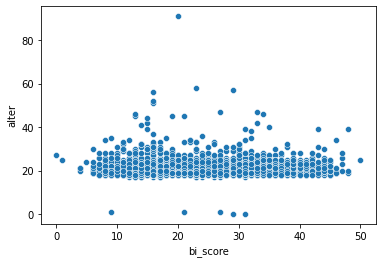

In [35]:
sns.scatterplot(data=df, x="bi_score", y="alter")

In [36]:
X = df.drop(['sel'], axis = 1) #independent variable

In [37]:
X
feature_names = X.columns

In [38]:
y = df['sel'] 

### **Feature Engineering**

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) #train

In [40]:
X_train.shape

(3324, 47)

In [41]:
X_test.shape

(831, 47)

In [42]:
y_train.shape

(3324,)

In [43]:
y_train.value_counts()

0    2793
1     531
Name: sel, dtype: int64

In [44]:
y_test.value_counts()

0    702
1    129
Name: sel, dtype: int64

In [45]:
2793/531 #class balance

5.259887005649717

In [46]:
702/129 #class balance

5.441860465116279

## **Data Modelling**

### **Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression #LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = clf.predict(X_test) #prediction

In [49]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [50]:
y_test

3471    0
1136    0
2893    0
2603    0
1177    0
       ..
473     1
188     1
4050    0
329     1
1806    0
Name: sel, Length: 831, dtype: int64

In [51]:
import numpy as np
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [52]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

#### **Accuracy of Logistic Regression**

In [53]:
from sklearn.metrics import accuracy_score #accuracy
accuracy_score(y_test, y_pred)

0.9951865222623345

#### **ROC of LR**

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[700,   2],
       [  2, 127]])

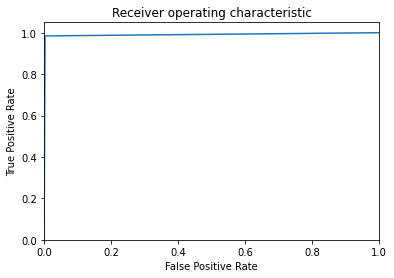

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
plt.savefig('roc_logistic_regression.png')

### **Decision Tree**

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df)
X = df.drop(['sel'], axis = 1) #independent variable
y = df['sel'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) 

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

from sklearn.metrics import accuracy_score #accuracy
y_pred = clf.predict(X_test) #prediction
accuracy_score(y_test, y_pred)

feat importance = [0.00238812 0.02008985 0.04001293 0.03363259 0.02500124 0.08626344
 0.02474682 0.0097313  0.01331296 0.00782484 0.00030084 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00055659 0.00030084 0.         0.00042977
 0.         0.00102688 0.         0.         0.00056356 0.00091237
 0.         0.         0.00057762 0.00024211 0.         0.
 0.         0.         0.         0.00054152 0.         0.
 0.         0.         0.         0.         0.        ]


0.9229843561973526

In [57]:
df3 = pd.DataFrame(list(zip(X_train.columns, feat_importance)),
               columns =['Features', 'Values'])#

In [58]:
#df3

In [59]:
#df3 = df3.sort_values(by=['Values'], ascending = False)

In [60]:
#df3

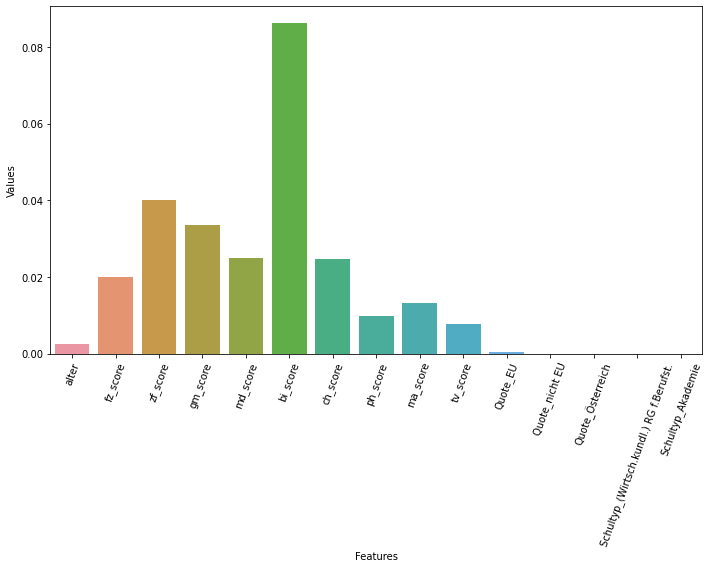

In [61]:
fig = plt.figure(figsize=(10, 8)) #plot save
sns.barplot(x="Features", y="Values", data=df3.iloc[0:15, :])
plt.xticks(rotation=70)
plt.tight_layout()
fig.savefig('bar1.png', dpi=400) #plot save

In [62]:
import graphviz

In [63]:
X_train.columns
list(X_train.columns)



['alter',
 'fz_score',
 'zf_score',
 'gm_score',
 'md_score',
 'bi_score',
 'ch_score',
 'ph_score',
 'ma_score',
 'tv_score',
 'Quote_EU',
 'Quote_nicht EU',
 'Quote_Österreich',
 'Schultyp_(Wirtsch.kundl.) RG f.Berufst.',
 'Schultyp_Akademie',
 'Schultyp_Aufbaugymnasium',
 'Schultyp_Aufbaumittelschule',
 'Schultyp_Aufbaurealgymnasium',
 'Schultyp_BA f.Kindergartenpädagogik',
 'Schultyp_BA für Sozialpädagogik',
 'Schultyp_Berufsreifeprüfung',
 'Schultyp_Externistenreifeprüfung',
 'Schultyp_Frauenoberschule',
 'Schultyp_Gymnasium',
 'Schultyp_Gymnasium für Berufstätige',
 'Schultyp_H.Lehranst. f.wirtsch. Berufe',
 'Schultyp_H.land- u.forstwirt. Lehranst.',
 'Schultyp_H.techn.u.gewerbl. Lehranstalt',
 'Schultyp_Handelsakademie',
 'Schultyp_Humanistisches Gymnasium',
 'Schultyp_Lehrerbildungsanstalt',
 'Schultyp_Mathematisches Realgymnasium',
 'Schultyp_Naturwissensch. Realgymnasium',
 'Schultyp_Neusprachliches Gymnasium',
 'Schultyp_Oberstufenrealgymnasium',
 'Schultyp_Realgymnasium',
 

In [64]:
y_train

89      1
2681    0
367     1
2747    0
297     1
       ..
2897    0
2765    0
906     0
3985    0
235     1
Name: sel, Length: 3324, dtype: int64

In [65]:
from sklearn.metrics import accuracy_score #accuracy
y_pred = clf.predict(X_test) #prediction
accuracy_score(y_test, y_pred)

0.9229843561973526

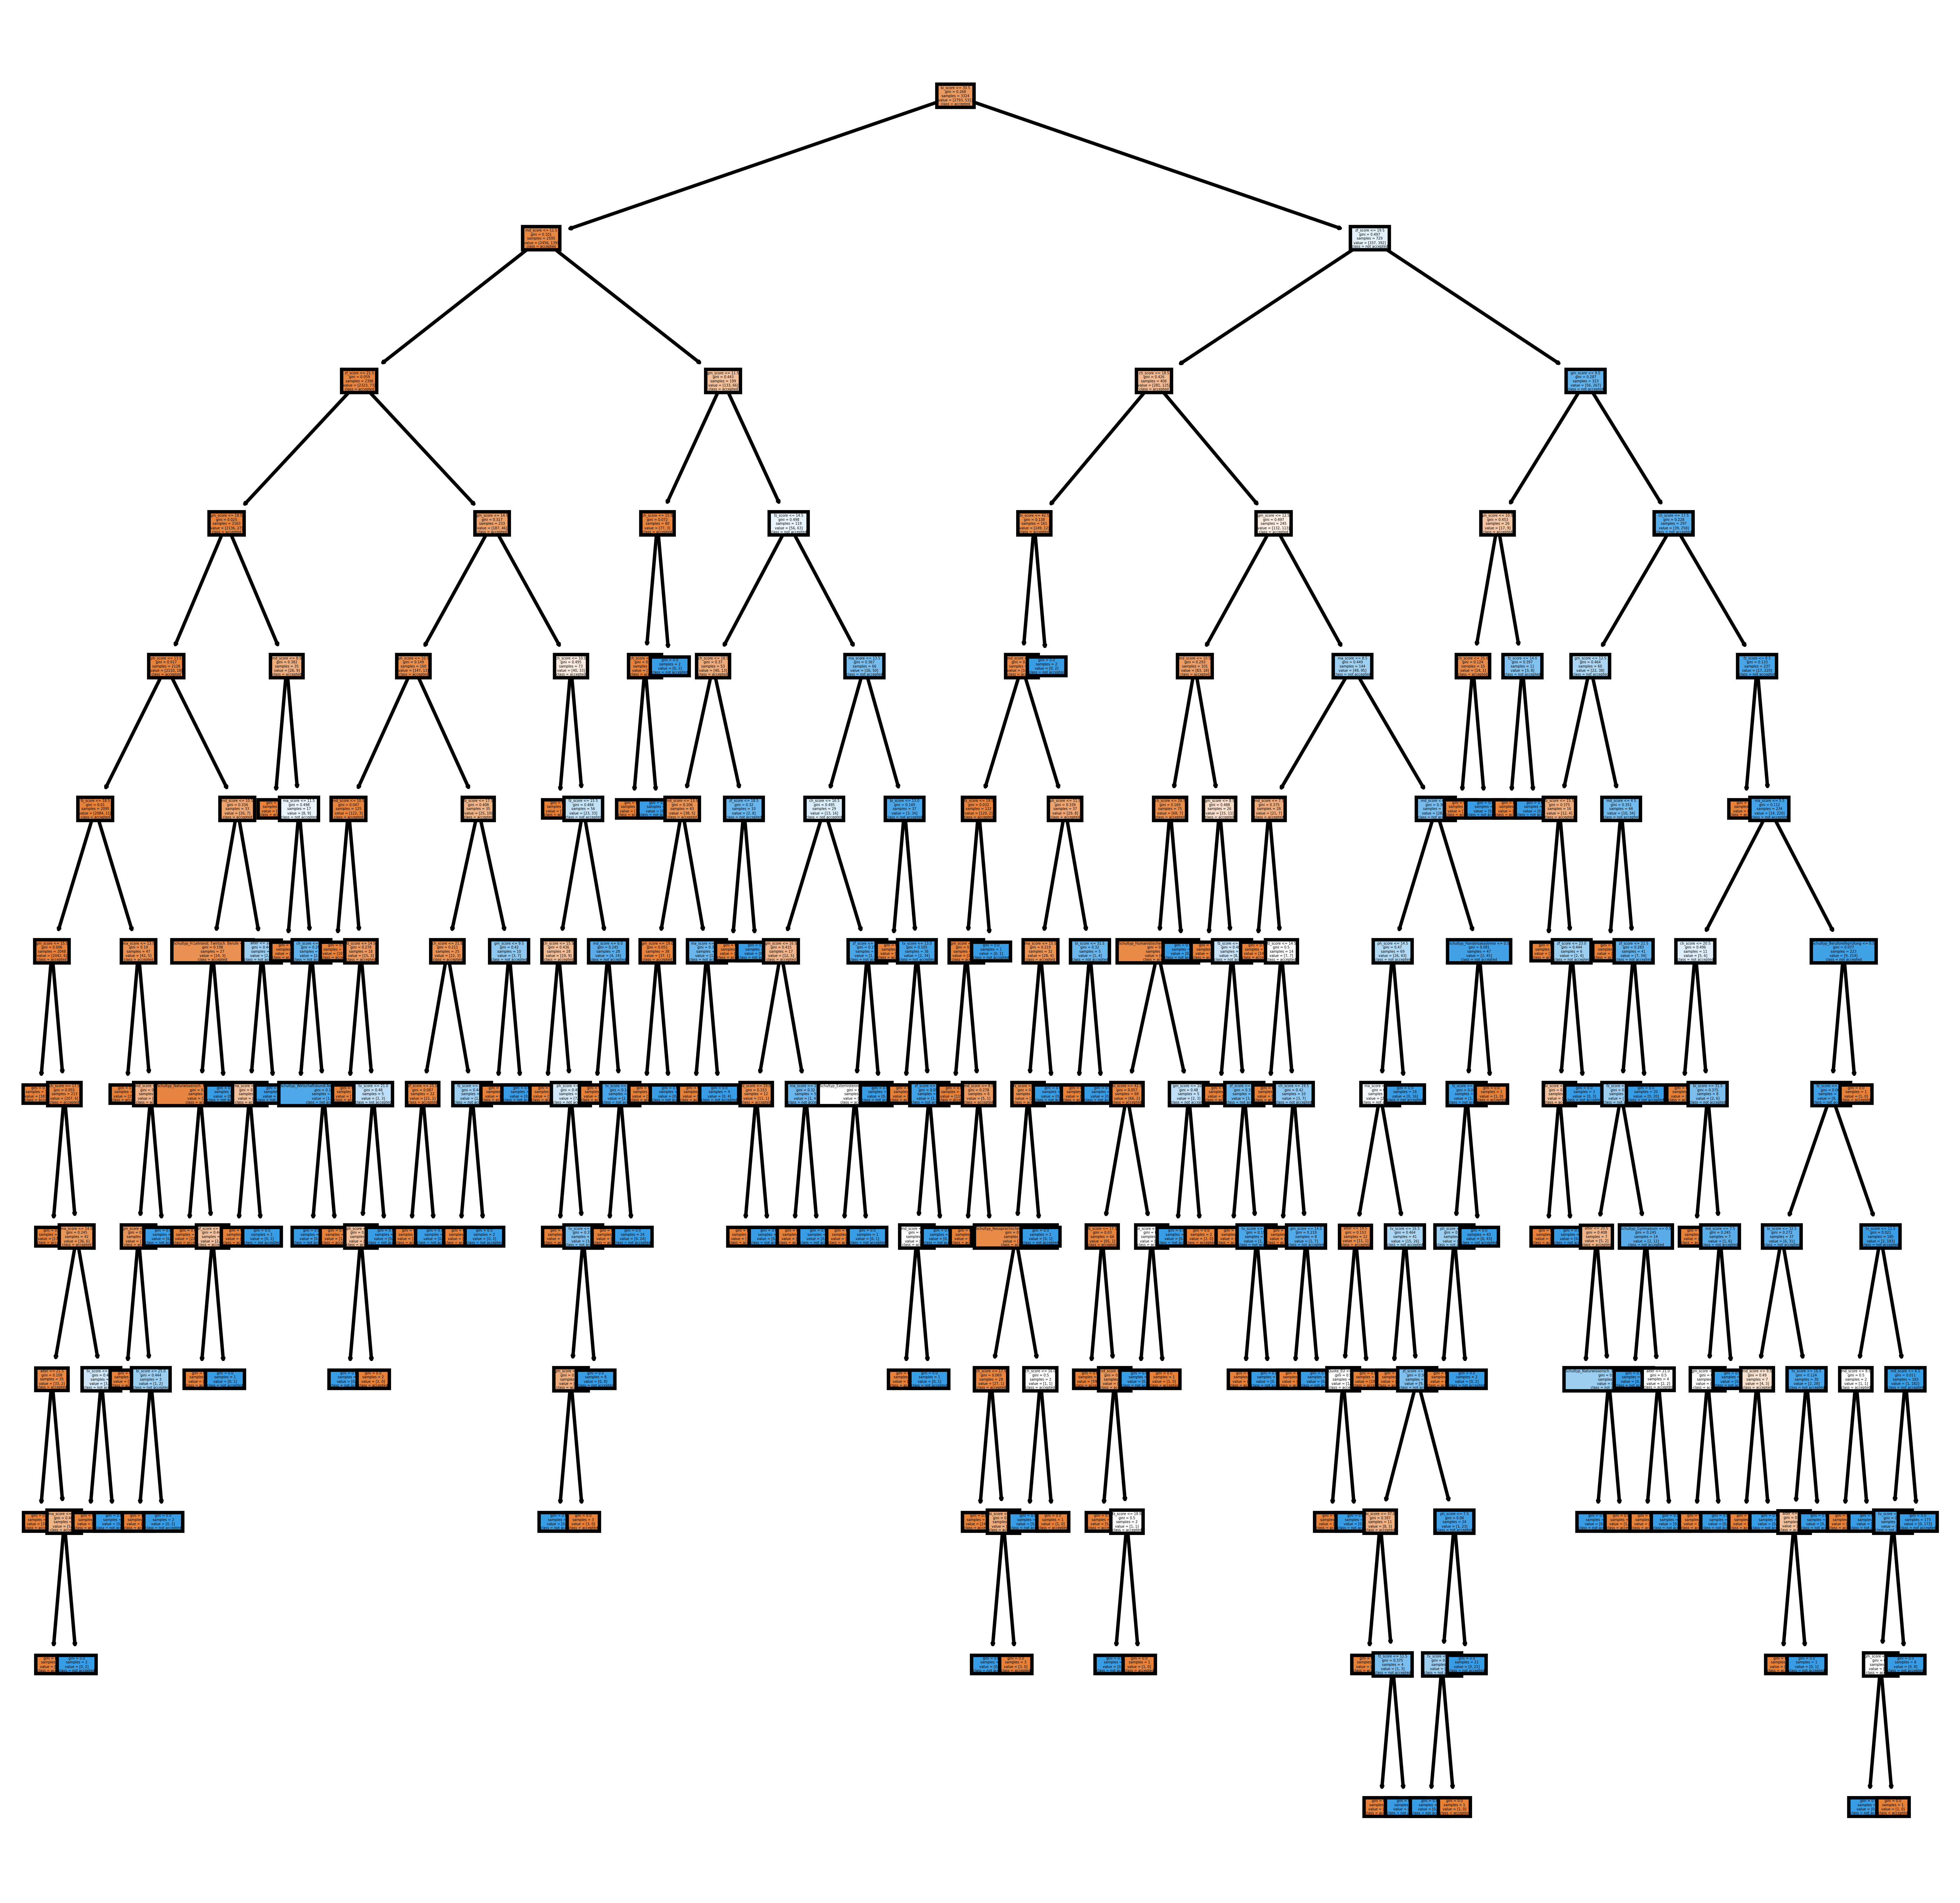

In [66]:
fn= list(X_train.columns)
cn=['accepted', 'not accepted']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=700)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('tree.png')

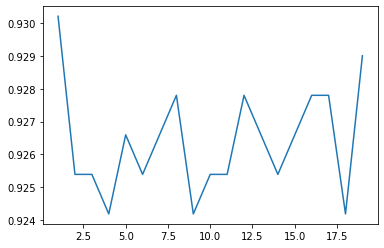

<Figure size 432x288 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score #accuracy
scores = []

for i in list(range(1,20)):
	clf = DecisionTreeClassifier(max_depth = 6)
	clf.fit(X_train, y_train)
	y_pred = clf.predict(X_test) #prediction
	scores.append(accuracy_score(y_test, y_pred))
	
	
plt.plot(list(range(1,20)), scores)
plt.show() #the compare which depth is the best
plt.savefig('tree_depth.png')

In [68]:
scores

[0.9302045728038508,
 0.9253910950661853,
 0.9253910950661853,
 0.924187725631769,
 0.9265944645006017,
 0.9253910950661853,
 0.9265944645006017,
 0.927797833935018,
 0.924187725631769,
 0.9253910950661853,
 0.9253910950661853,
 0.927797833935018,
 0.9265944645006017,
 0.9253910950661853,
 0.9265944645006017,
 0.927797833935018,
 0.927797833935018,
 0.924187725631769,
 0.9290012033694344]

####  **ROC**

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[673,  29],
       [ 30,  99]])

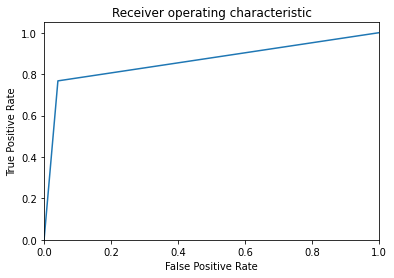

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.savefig('roc_dt.jpg', dpi = 300)



In [71]:
fpr

{0: array([0.        , 0.04131054, 1.        ]),
 1: array([0.        , 0.04131054, 1.        ])}

In [72]:
roc_curve(y_test, y_pred)

(array([0.        , 0.04131054, 1.        ]),
 array([0.        , 0.76744186, 1.        ]),
 array([2, 1, 0]))

### **Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) #prediction
from sklearn.metrics import accuracy_score #accuracy
accuracy_score(y_test, y_pred)

0.9614921780986763

**Feature Importance**

In [74]:
import numpy as np
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)



In [75]:
std[0:10]

array([0.00729963, 0.03142515, 0.04757669, 0.03532157, 0.03380823,
       0.09805384, 0.08272547, 0.06549281, 0.051971  , 0.04038777])

In [76]:
importances

array([2.26766082e-02, 7.60181308e-02, 1.00862756e-01, 1.05865193e-01,
       7.63731788e-02, 1.82182389e-01, 1.20651074e-01, 9.57878022e-02,
       9.18516056e-02, 6.45113032e-02, 6.06301884e-03, 1.26408875e-03,
       6.00055786e-03, 5.01755863e-05, 1.03748279e-05, 1.06173703e-04,
       0.00000000e+00, 2.54093064e-04, 8.89137730e-06, 6.46842496e-06,
       9.93192761e-04, 5.03911769e-04, 0.00000000e+00, 5.91750879e-03,
       9.16031686e-06, 1.55316709e-03, 7.71254648e-05, 2.06688214e-03,
       2.59322202e-03, 3.34085213e-03, 4.10033965e-06, 5.67874118e-04,
       4.07332297e-03, 2.60328862e-03, 2.53643865e-03, 4.13423753e-03,
       3.10945479e-05, 0.00000000e+00, 7.04308912e-04, 1.62303303e-03,
       2.69335291e-05, 2.65211535e-03, 7.53962719e-06, 5.97121850e-03,
       6.90407850e-03, 3.30782575e-04, 2.30727086e-04])

Text(0, 0.5, 'Mean decrease in impurity')

<Figure size 20000x40000 with 0 Axes>

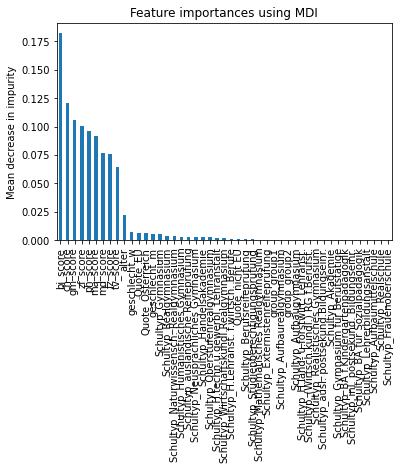

In [77]:
import pandas as pd
from matplotlib.pyplot import figure

figure(figsize=(50, 100), dpi=400)

forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending = False)
#forest_importances = forest_importances[0:10]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()
#fig.savefig('fig1.png', dpi = 400,  bbox_inches="tight")

In [78]:
forest_importances.to_csv('forest_importances.csv')

In [79]:
X.shape

(4155, 47)

#### **ROC**

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[696,   6],
       [ 26, 103]])

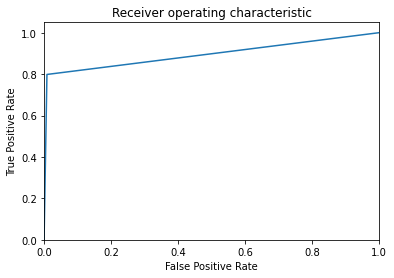

<Figure size 432x288 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
plt.savefig('roc_dt.png')

### **Genetic Algorithm**

In [ ]:
import pandas as pd
df = pd.read_csv("marie_data.csv")
df = df.dropna()
X = df.drop(['sel'], axis = 1) #independent variable
y = df['sel'] 
X = pd.get_dummies(X)


In [ ]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
import pandas as pd

from genetic_selection import GeneticSelectionCV

mcc = make_scorer(matthews_corrcoef)
estimator = LogisticRegression(solver = "liblinear", C = 6, tol = 1, fit_intercept = True)

from sklearn.model_selection import *
report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 
rkf = RepeatedStratifiedKFold(n_repeats = 2, n_splits = 10)
for i in range(2,11):
  
  selector = GeneticSelectionCV(estimator,
                                cv = rkf,
                                verbose = 0,
                                scoring = mcc,
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.05,
                                #tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  
  selector = selector.fit(X, y)
  genfeats = X.columns[selector.support_]
  genfeats = list(genfeats)
  print("Chosen Feats:  ", genfeats)

  cv_score = selector.generation_scores_[-1]
  nofeats.append(len(genfeats)) 
  chosen_feats.append(genfeats) 
  cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

In [ ]:
report.to_excel('report.xlsx')